# Sales Analysis
- We are going to analyze and answer business questions about 12 months worth of sales data. 
- The data contains hundreds of thousands of electronics store purchase records broken down by month, product type, cost, purchase address, etc.

 We will explore 5 high level business questions related to our data:

* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* What time of the day do we make the most sales?
* What products are most often sold together?
* What product sold the most? Why do you think it sold the most?

In [1]:
import pandas as pd
import os

### Merging 12 month  of Sales data
- The data is organized in different months as the are in different CSV files for every month thus we need to merge into one dataframe
* This is achieved by using the **glob module** to retrieve the files/path names and matching them using a sppecified pattern


In [2]:
import glob
files=glob.glob('./Sales_Data/*')
df_list=[]
for file in files:
    data=pd.read_csv(file)
    df_list.append(data)
df=pd.concat(df_list)
df.shape
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Saving the data frame to a CSV

In [3]:
df.to_csv('all_data', index=False)

In [4]:
data=pd.read_csv('all_data')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
##checking any missing valu
data.info() #there are about 40 missing values/40 empty rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

###### Finding missing values

In [6]:
nan_df=data[data.isna().any(axis=1)]  #axis=1--We are interested in the columns
nan_df.shape

(545, 6)

In [7]:
nan_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


###### Dropping missing values

In [9]:
all_data=data.dropna(how='all').reset_index(drop=True)
all_data.shape

(186305, 6)

In [10]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### checking duplicates

In [11]:
all_data.duplicated().value_counts()

False    185687
True        618
dtype: int64

###### Dropping duplicates

In [12]:
all_data.drop_duplicates(inplace=True)
all_data.shape

(185687, 6)

In [13]:
all_data.duplicated().value_counts()

False    185687
dtype: int64

In [14]:
# Row 517 has issues as it has no values
all_data.iloc[515:520]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
519,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"
520,177057,Bose SoundSport Headphones,1,99.99,04/09/19 08:57,"585 Cherry St, New York City, NY 10001"


#### Get rid of invalid dates in order date column 

In [15]:
#find text in order date 
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [17]:
all_data.iloc[515:519]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
518,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
519,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"
520,177057,Bose SoundSport Headphones,1,99.99,04/09/19 08:57,"585 Cherry St, New York City, NY 10001"


### Checking columns types and rectifying
- Price Each & Quantity has been identified as object instead of numbers
- Order data has been identified as object rather than date


In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


###### Converting column data types

In [19]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### Creating new features from the data ( feature engineering)

##### Adding Month column

In [21]:
all_data['month']=all_data['Order Date'].dt.month
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4


##### Adding sales column
- Sales= Quantity Ordered*Price Each

In [22]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


## Data Analysis
 ##### **1.** What was the best month for sales? How much was earned that month?


In [23]:
#Total sales
all_data['Sales'].sum()

34465537.94

In [24]:
monthly_sales=all_data.groupby('month').sum()
monthly_sales

,Quantity Ordered,Price Each,Sales
month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


In [25]:
monthly_sales=all_data.groupby('month')['Sales'].sum().round().reset_index(name='Sales')
monthly_sales

,month,Sales
0,1,1821413.0
1,2,2200078.0
2,3,2804973.0
3,4,3389218.0
4,5,3150616.0
5,6,2576280.0
6,7,2646461.0
7,8,2241083.0
8,9,2094466.0
9,10,3734778.0


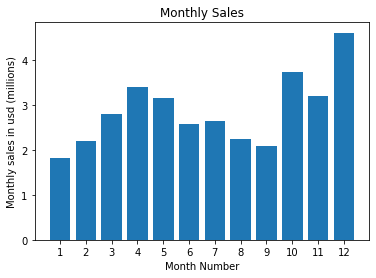

In [26]:
#Visualization
import matplotlib.pyplot as plt
months=range(1,13)
sales=(monthly_sales['Sales'])/1000000
plt.bar(months,sales)
plt.title('Monthly Sales')
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Monthly sales in usd (millions)')
plt.show()

- Thus, **December** is the month with the most sales of **4.608296 million**

### **2.** What city sold the most product?

In [27]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00


###### Creating a new city column

In [28]:
# Get The city
def get_city(address):
    return address.split(",")[1].strip(" ")

# Get the state
def get_state(address):
    return address.split(",")[2].split()[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f'{get_city(x)}, {get_state(x)}')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [29]:
sales_by_city = all_data.groupby(['City'])['Sales'].sum().round().reset_index(name='Sales').sort_values(by='Sales', ascending=False)
sales_by_city

,City,Sales
8,"San Francisco, CA",8254744.0
4,"Los Angeles, CA",5448304.0
5,"New York City, NY",4661867.0
2,"Boston, MA",3658628.0
0,"Atlanta, GA",2794199.0
3,"Dallas, TX",2765374.0
9,"Seattle, WA",2745046.0
7,"Portland, OR",1870011.0
1,"Austin, TX",1818044.0
6,"Portland, ME",449321.0


**San Fransisco** had the highest Sales with **8.254744 million**

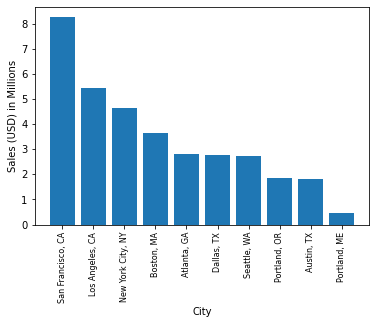

In [30]:
#Visualization
plt.bar(sales_by_city['City'], sales_by_city['Sales']/1000000)
plt.ylabel('Sales (USD) in Millions')
plt.xlabel('City')
plt.xticks(sales_by_city['City'].values, rotation='vertical', size=8)
plt.show()


#### 3) What time of the day do people make most purchases?

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [35]:
# Add hour column 
all_data['Hour']=all_data['Order Date'].dt.hour

# Add minute column 
all_data['Minutes']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [37]:
# We will do orders for each hour and sum them up
sales_per_hr = all_data.groupby('Hour')['Order ID'].count().reset_index(level=0, name='Orders')
sales_per_hr.head()

,Hour,Orders
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852


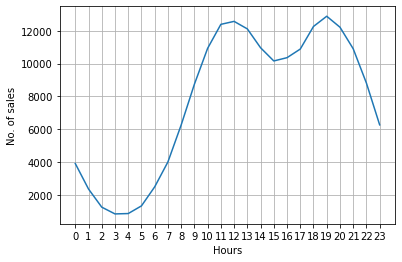

In [39]:
plt.plot(sales_per_hr['Hour'], sales_per_hr['Orders'])
plt.xticks(sales_per_hr['Hour'])
plt.xlabel('Hours')
plt.ylabel('No. of sales')
plt.grid()
plt.show()

**11am-12pm** and **6pm-8pm** people make more purchases around that those time frames.

### 4) What products are most often sold together?


###### Group product with the same order id because orders sold together share the same ID

- Groupby the 'Order ID' and 'Product' columns, then call transform which will return data aligned to the original df
- Apply a lambda where we join the text entries:

In [42]:
dt=all_data.groupby('Order ID')['Product']
dt.head()

0               USB-C Charging Cable
1         Bose SoundSport Headphones
2                       Google Phone
3                   Wired Headphones
4                   Wired Headphones
                     ...            
186300        AAA Batteries (4-pack)
186301                        iPhone
186302                        iPhone
186303        34in Ultrawide Monitor
186304          USB-C Charging Cable
Name: Product, Length: 185686, dtype: object

In [43]:
df = all_data
df['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minutes,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30,Bose SoundSport Headphones
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27,Wired Headphones


In [44]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
4,176561,Wired Headphones
5,176562,USB-C Charging Cable


In [47]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    combine = combinations(row_list, 2)
    count.update(Counter(combine))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

**Iphone** and **Lightning Charging Cable** were sold together.

#### 5) What product sold the most? Why do you think it sold the most?


In [48]:
sales_per_product = all_data.groupby('Product').sum()['Quantity Ordered'].reset_index(level=0, name='Quantity')
sales_per_product

,Product,Quantity
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


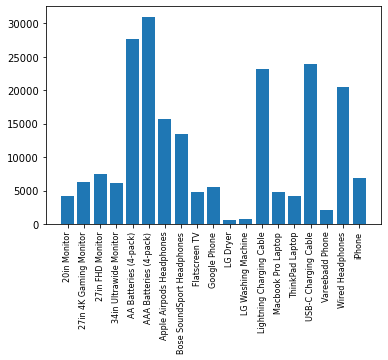

In [49]:
plt.bar(sales_per_product['Product'], sales_per_product['Quantity'])
plt.xticks(sales_per_product['Product'].values, rotation='vertical', size=8)
plt.show()

In [50]:
prices = all_data.groupby('Product').mean()['Price Each'].reset_index(level=0, name='Price')
prices

,Product,Price
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\user\AppData\Local\Temp\ipykernel_11836\3574501179.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prices['Product'].values, rotation='vertical', size=8)
C:\Users\user\AppData\Local\Temp\ipykernel_11836\3574501179.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


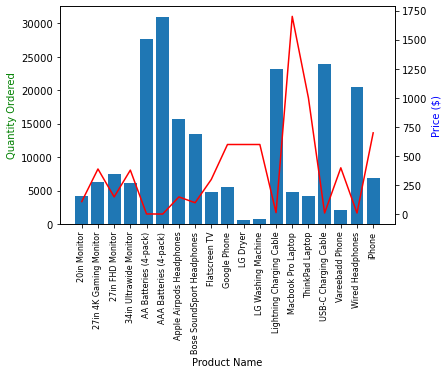

In [52]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(prices['Product'], prices['Price'], color='red')
ax1.bar(sales_per_product['Product'], sales_per_product['Quantity'])

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(prices['Product'].values, rotation='vertical', size=8)
fig.show()

**Low price items fetch more sales quantity**